# Testing and Comparison of all Algorithms
### Imports and Setup
##### Algorithm Imports and Setup

In this cell, we import various algorithmic functions from their dedicated modules. The imports include:
- `brute_force_non_constrained` from the brute force module.
- `greedy_algorithm_non_constrained` from the greedy algorithm module.
- `maxMatrixSum_non_constraint` from the dynamic programming module.
- `max_segment_branch_and_bound` from the branch and bound module.
- `ant_colony_algorithm` from the ant colony approach module.
- `find_max_sum_submatrix` from the randomized approach module.
- `max_segment_2d_genetic` from the genetic algorithm module.
Additionally, we import the `TestAlgorithm` class, which is utilized for testing and evaluating the performance of these algorithms.

In [12]:
from brute.brute_force import brute_force_non_constrained
from greedy.greedy_algorithm import greedy_algorithm_non_constrained
from dynamic_programming.dynamic_programming import maxMatrixSum_non_constraint
from branch_and_bound.branch_and_bound_non_constrainred_final import max_segment_branch_and_bound
from ant_colony_approach.ant_colony_algorithm_no_constraint import  ant_colony_algorithm 
from randomized_approach.gradient_unconstrained import find_max_sum_submatrix
from genetic_algorithm.genetic_algorithm_no_constraint import max_segment_2d_genetic 
from test_class.test_algorithm import TestAlgorithm

##### Library Imports

In this cell, we import key libraries for our data processing and visualization tasks:
- `numpy` for numerical operations and matrix manipulations.
- `timeit` for measuring the execution time of small code snippets.
- `matplotlib.pyplot` and `seaborn` for data visualization and creating plots.
- `pandas` for data manipulation and analysis, particularly with dataframes.

In [13]:
import timeit
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

### Test Algorithm Instance Initialization

In this cell, we initialize an instance of the `TestAlgorithm` class:
- `test_algorithm_instance` is created to facilitate the testing of various algorithmic functions imported earlier.
- This instance will be used to run tests and evaluate the performance of different algorithms throughout the notebook.

In [14]:
test_algorithm_instance = TestAlgorithm()

# Non-constrained Algorithms Test

##### Running Algorithm Tests

In this part of the notebook, we execute the testing of multiple algorithms:
- The function `run_multiple_algorithms` is called with `algorithms_to_test` as its argument.
- This process initiates the testing of each algorithm listed in `algorithms_to_test` and stores the results in `all_test_results`.
- `all_test_results` will contain performance data for each algorithm, which is used for further analysis and comparison.

In [15]:
algorithms_to_test = [
    (brute_force_non_constrained, 'Brute Force'),
    (greedy_algorithm_non_constrained, 'Greedy Algorithm'),
    (maxMatrixSum_non_constraint,'Dyanmic Programming'),
    (max_segment_branch_and_bound, 'Branch and Bound'),
    (find_max_sum_submatrix,'Randomized Approach Gradient'),
    (max_segment_2d_genetic,'Genetic Algorithm'),
]

In [16]:
def run_multiple_algorithms(algorithms):
    all_results = {}
    for algorithm, name in algorithms:
        results = test_algorithm_instance.run_algorithm_tests(algorithm, name)
        all_results[name] = results
        
    return all_results

all_test_results = run_multiple_algorithms(algorithms_to_test)


TESTING Brute Force WITHOUT CONSTRAINTS


Test Case 1 skipped: Matrix is empty.

Test Case 2 skipped: Matrix contains non-numeric values.

Test Case 3 skipped: Matrix is non-rectangular.

Test Case 4 skipped: Matrix is non-rectangular.

Test Case 5 skipped: Matrix is one-dimensional.

Test Case 6 succeeded
Result: 45
Expected Result: 45
Indices: (2, 1) to (2, 1)
Expected Indices: (2, 1) to (2, 1)
Matrix:
[-81, 0]
[20, -77]
[-45, 45]
[-6, -45]

Submatrix
45	

Time taken: 0.000095 seconds


Test Case 7 succeeded
Result: 126
Expected Result: 126
Indices: (0, 3) to (0, 5)
Expected Indices: (0, 3) to (0, 5)
Matrix:
[-89, -18, -34, 60, 53, 13]
[12, 92, -69, -98, 28, -13]

Submatrix
60	53	13	

Time taken: 0.000137 seconds


Test Case 8 succeeded
Result: 100
Expected Result: 100
Indices: (0, 0) to (2, 0)
Expected Indices: (0, 0) to (2, 0)
Matrix:
[47, -44]
[-13, 37]
[66, 0]
[-16, -93]
[13, -26]
[-24, 0]

Submatrix
47	
-13	
66	

Time taken: 0.000178 seconds


Test Case 9 succeeded
Result: 183


##### Comparative Visualization of Algorithm Performance

- The function `create_comparative_plots` takes `all_results` as input, which contains the performance data of different algorithms.
- Inside the function, we prepare a DataFrame named `df` from `all_results`, detailing the execution time and matrix size for each algorithm.
- We then utilize `seaborn` and `matplotlib` to create a comparative line plot that visualizes the execution time against the number of elements for each algorithm.
- Different line styles are assigned to each algorithm for clear differentiation in the plot.
- The final plot provides a visual comparison of how each algorithm performs in terms of execution time as the matrix size varies.


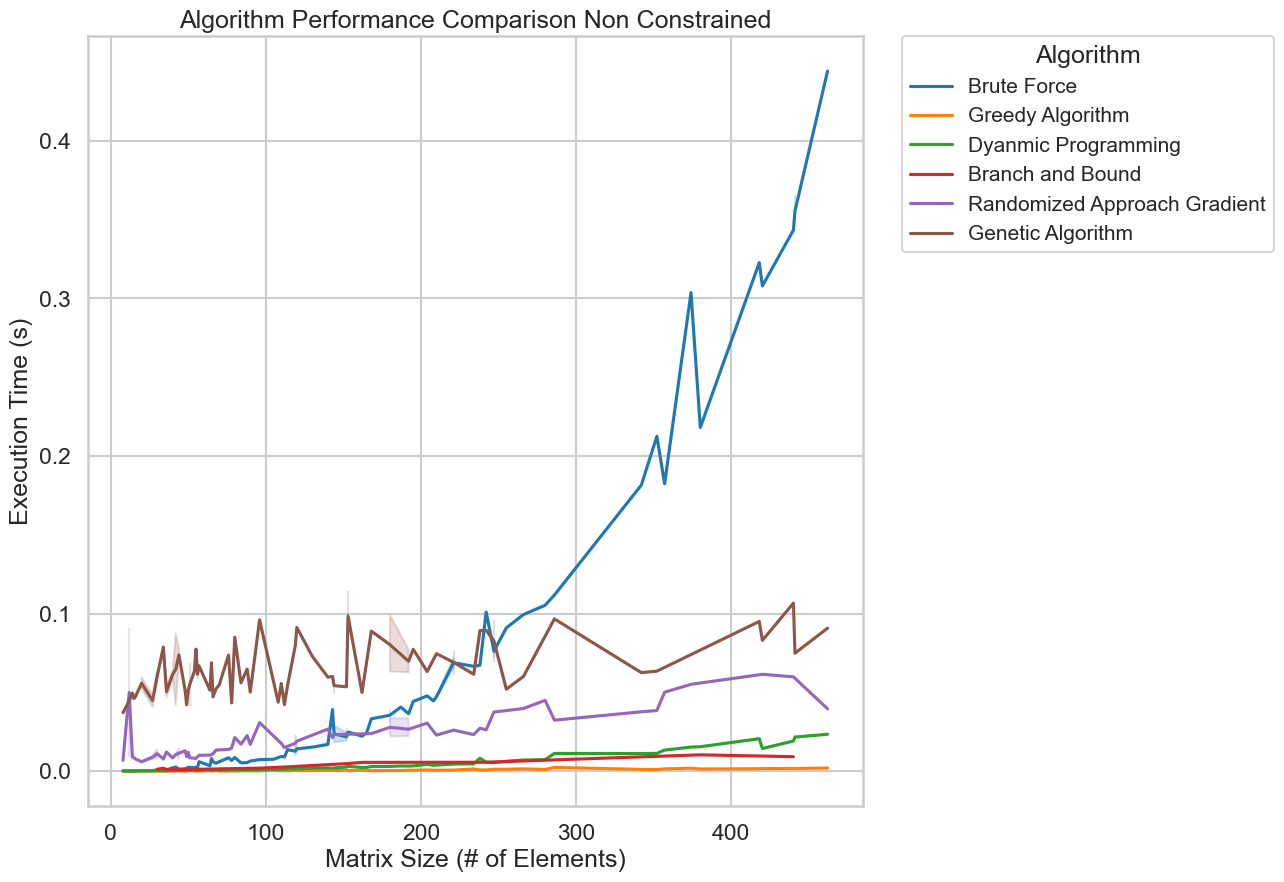

In [17]:
def create_comparative_plots(all_results):

    plot_data = []
    for name, results in all_results.items():
        for time, size in results['size_run_time_test']:
            plot_data.append({
                'Algorithm': name,
                'Execution Time': time ,
                'Number of Elements': size
            })

    df = pd.DataFrame(plot_data)
    line_styles = {
        'Brute Force': '-', 
        'Greedy Algorithm': '--',
        'Dyanmic Programming': '-.',
        'Branch and Bound': ':',
        'Ant Colony Algorithm': (0, (3, 5, 1, 5)),
        'Randomized Approach Gradient': (0, (5, 10)),
        'Genetic Algorithm': (0, (3, 10, 1, 10))
    }

    # Set seaborn style and context
    sns.set_style("whitegrid")
    sns.set_context("talk")

    # Comparative Line Plot for Execution Time vs Number of Elements
    plt.figure(figsize=(10, 10))
    
    sns.lineplot(x='Number of Elements', y='Execution Time', hue='Algorithm', data=df)
    plt.title('Algorithm Performance Comparison Non Constrained')
    plt.xlabel('Matrix Size (# of Elements)')
    plt.ylabel('Execution Time (s)')
    plt.legend(title='Algorithm', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize='small')


    plt.show()

create_comparative_plots(all_test_results)

From the graph, we can observe that most algorithms maintain a relatively stable and low execution time across varying matrix sizes, with the exception of the Brute Force Algorithm, which exhibits a higher variance in execution times, including some significant spikes indicating instances where this algorithm took considerably longer to execute. The Dynamic Programming, Branch and Bound, and Greedy Algorithm lines are closely clustered near the bottom, suggesting lower and more consistent execution times compared to the Genetic Algorithm and Randomized Approach Gradient.

##### Average Execution Time Analysis

- The function `plot_average_execution_time` is defined to calculate and plot the average execution time for each algorithm in `all_results`.
- It iterates through each algorithm's results, compiles the execution times into a DataFrame, and then calculates the average time for each algorithm.
- A bar plot is created using `seaborn` to visually represent these average execution times, facilitating an easy comparison across different algorithms.
- The plot provides insights into which algorithms are generally faster or slower on average, aiding in the assessment of their performance efficiency.

C:\Users\Amrithya\AppData\Local\Temp\ipykernel_24284\3580402410.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Execution Time', y='Algorithm', data=avg_times, palette="viridis")


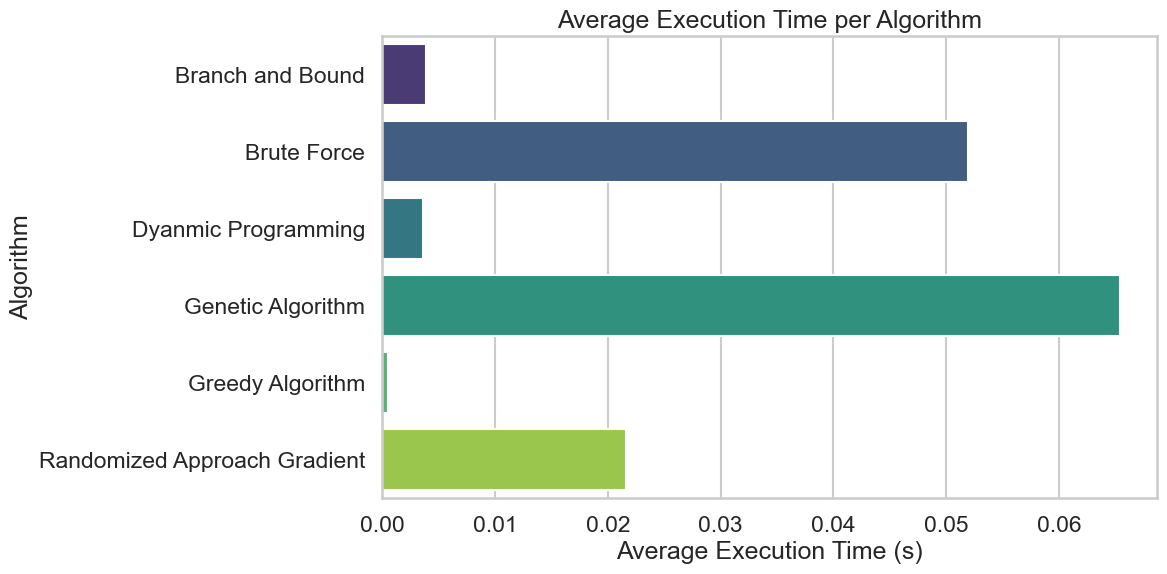

In [18]:
def plot_average_execution_time(all_results):
    plot_data = []
    for name, results in all_results.items():
        for time, _ in results['size_run_time_test']:
            plot_data.append({'Algorithm': name, 'Execution Time': time})
    
    df = pd.DataFrame(plot_data)
    avg_times = df.groupby('Algorithm')['Execution Time'].mean().reset_index()

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Execution Time', y='Algorithm', data=avg_times, palette="viridis")
    plt.title('Average Execution Time per Algorithm')
    plt.xlabel('Average Execution Time (s)')
    plt.ylabel('Algorithm')
    plt.show()

plot_average_execution_time(all_test_results)

The bar chart compares the average execution time it takes for different algorithms to complete a task. The Genetic Algorithm takes the longest time on average, which might suggest it's a bit slower for this particular problem. The Greedy Algorithm is the fastest, finishing tasks in the shortest average time. Dynamic Programming and Branch and Bound also show quick average times, while the Brute Force and Randomized Approach Gradient algorithms land in the middle range. 

##### Execution Time Distribution Analysis

- The function `plot_execution_time_distribution` is designed to evaluate and visualize the spread of execution times across different algorithms in `all_results`.
- It aggregates the execution times from each algorithm's test results into a DataFrame and then uses this data to create a box plot.
- The box plot, generated with `seaborn`, showcases the median, quartiles, and potential outliers in execution times for each algorithm, providing a statistical view of their performance.
- This visualization is particularly useful for understanding the consistency and reliability of each algorithm in terms of execution time.

C:\Users\Amrithya\AppData\Local\Temp\ipykernel_24284\1483780679.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Algorithm', y='Execution Time', data=df, palette="Set2")


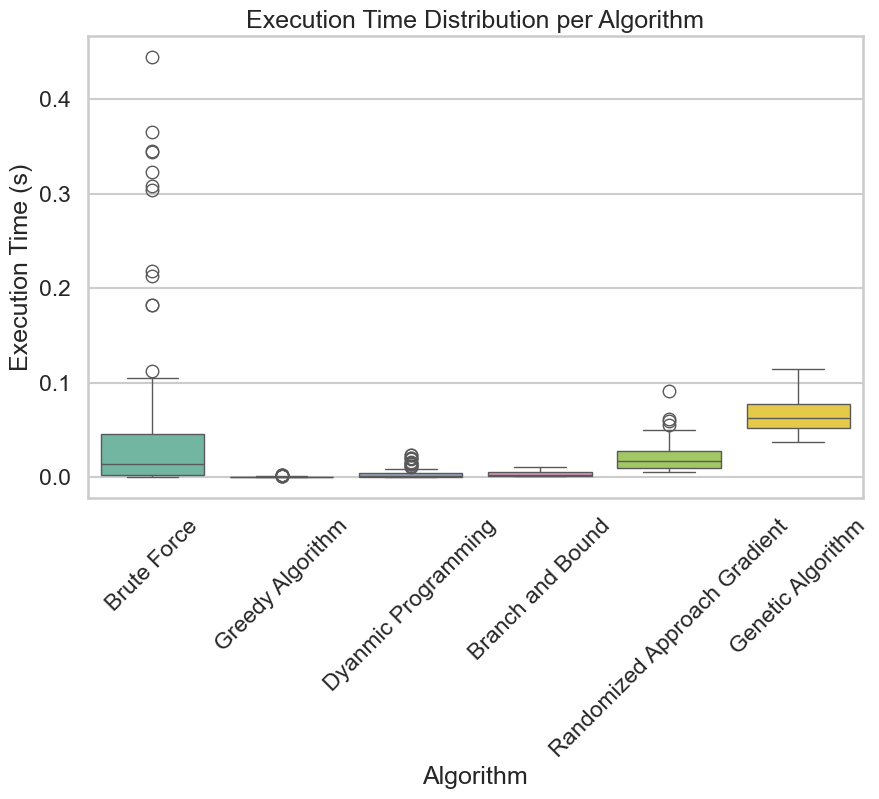

In [19]:
def plot_execution_time_distribution(all_results):
    plot_data = []
    for name, results in all_results.items():
        for time, _ in results['size_run_time_test']:
            plot_data.append({'Algorithm': name, 'Execution Time': time})

    df = pd.DataFrame(plot_data)

    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Algorithm', y='Execution Time', data=df, palette="Set2")
    plt.xticks(rotation=45)
    plt.title('Execution Time Distribution per Algorithm')
    plt.xlabel('Algorithm')
    plt.ylabel('Execution Time (s)')
    plt.show()

plot_execution_time_distribution(all_test_results)



The provided box plot presents the spread of execution times for several algorithms. The Brute Force algorithm has a compact box, indicating consistent execution times, but it also has many outliers, showing occasional spikes in time. The Greedy Algorithm and Dynamic Programming both have very tight boxes and few outliers, suggesting they consistently run quickly and reliably. Branch and Bound and the Genetic Algorithm have a larger spread of times, shown by taller boxes, which means their execution times can vary more. The Genetic Algorithm, specifically, has a wide range, including several slower outliers. 

C:\Users\Amrithya\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x1000 with 0 Axes>

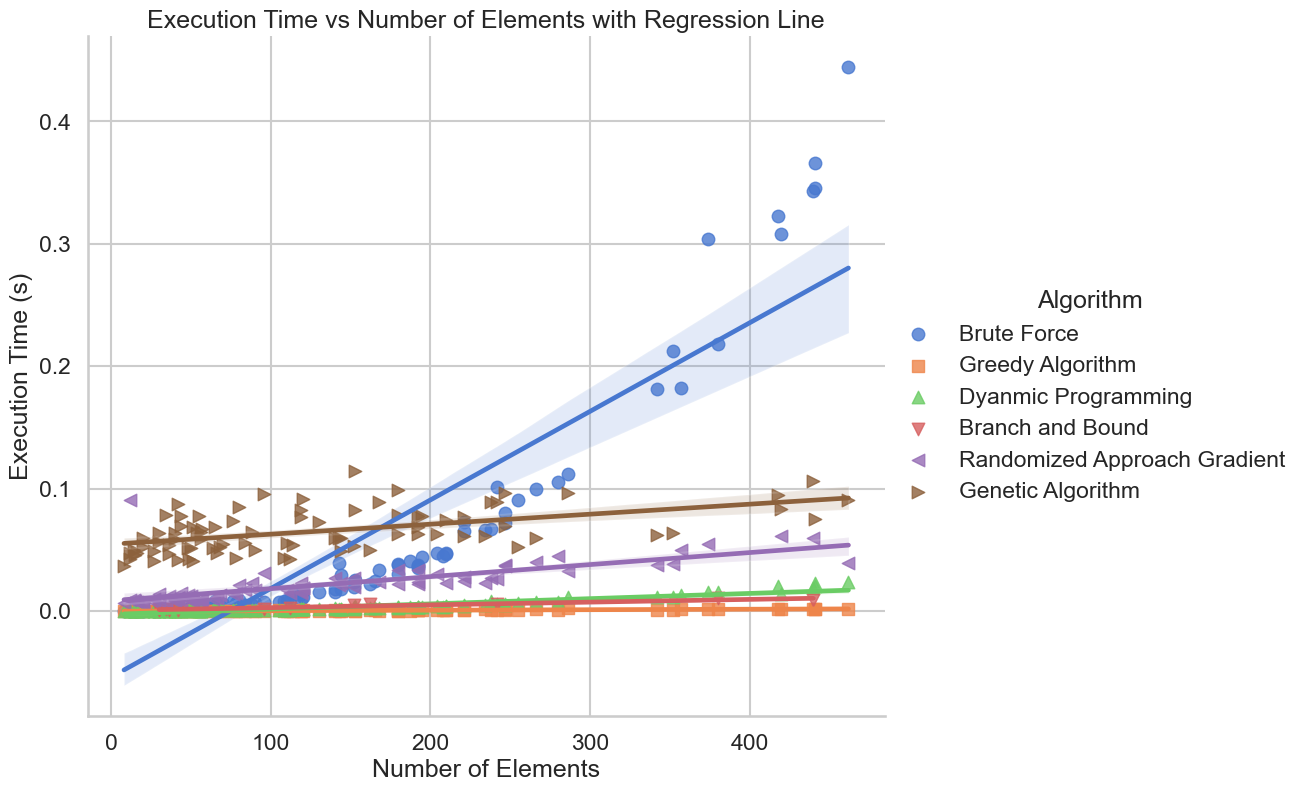

In [20]:
def plot_scatter_with_regression(all_results):
    plot_data = []
    for name, results in all_results.items():
        for time, size in results['size_run_time_test']:
            plot_data.append({'Algorithm': name, 'Execution Time': time, 'Number of Elements': size})

    df = pd.DataFrame(plot_data)

    plt.figure(figsize=(10, 10))
    sns.lmplot(x='Number of Elements', y='Execution Time', hue='Algorithm', data=df, height=8, aspect=1.2, palette="muted", markers=['o', 's',  '^', 'v', '<', '>'])
    plt.title('Execution Time vs Number of Elements with Regression Line')
    plt.xlabel('Number of Elements')
    plt.ylabel('Execution Time (s)')
    plt.show()

plot_scatter_with_regression(all_test_results)


The scatter plot with regression lines illustrates the relationship between execution time and the number of elements for a variety of algorithms, with the steepness of each line indicating the rate at which computation time increases. The Brute Force algorithm's steep ascent points to an exponential complexity, as it slows considerably with larger inputs. In contrast, the Greedy Algorithm maintains a nearly level line, suggesting it handles increasing sizes well, likely due to a linear or logarithmic complexity. Dynamic Programming's gentle slope hints at a polynomial complexity, benefiting from solving overlapping subproblems. The Branch and Bound method, with a slope slightly sharper than that of Dynamic Programming, likely has a higher complexity but outperforms Brute Force due to its ability to discard non-promising paths. Lastly, the Randomized Approach Gradient and Genetic Algorithm show varied times due to their random or heuristic elements, with their slopes indicating general scalability trends but not the full scope of their performance characteristics.

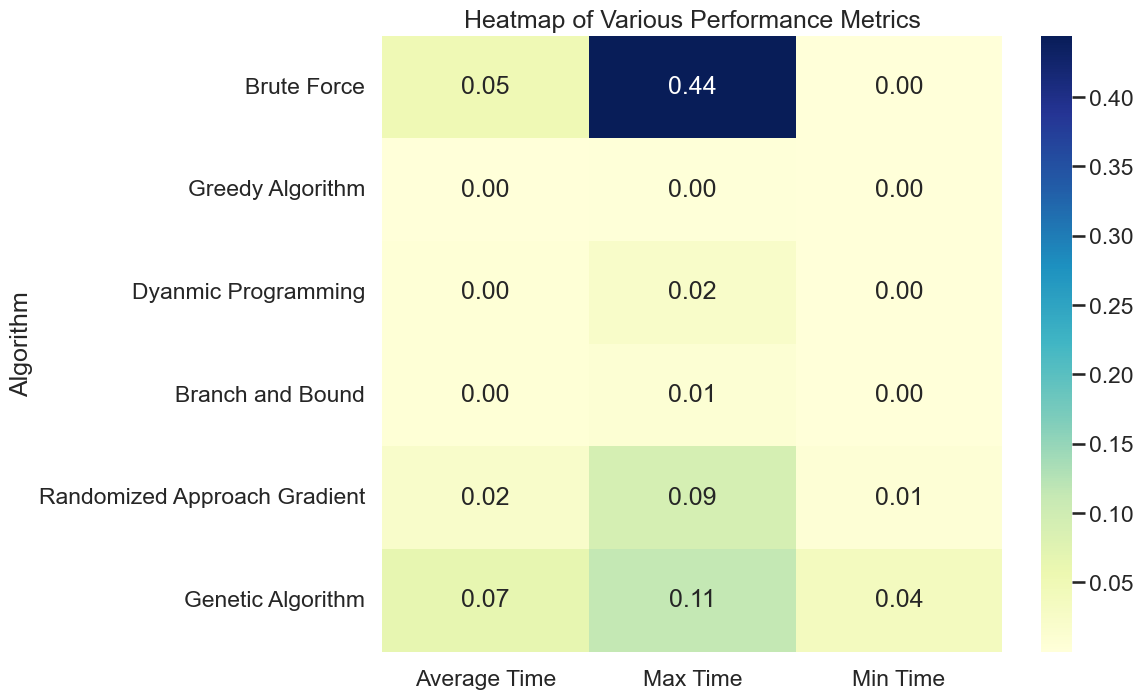

In [21]:
def plot_heatmap(all_results):
    metrics_data = []
    for name, results in all_results.items():
        average_time = np.mean([time for time, _ in results['size_run_time_test']])
        max_time = np.max([time for time, _ in results['size_run_time_test']])
        min_time = np.min([time for time, _ in results['size_run_time_test']])
        metrics_data.append({'Algorithm': name, 'Average Time': average_time, 'Max Time': max_time, 'Min Time': min_time})

    metrics_df = pd.DataFrame(metrics_data)
    metrics_df = metrics_df.set_index('Algorithm')

    plt.figure(figsize=(10, 8))
    sns.heatmap(metrics_df, annot=True, cmap="YlGnBu", fmt=".2f")
    plt.title('Heatmap of Various Performance Metrics')
    plt.show()

# Example usage
plot_heatmap(all_test_results)

The heatmap displays performance metrics for different algorithms, focusing on average, maximum, and minimum execution times. The darker the color, the higher the value. For instance, the Brute Force algorithm shows a high maximum time (0.65s), indicating it can be quite slow in the worst case. The Genetic Algorithm has a higher average time (0.11s) than others, suggesting it's generally slower. Other algorithms like Greedy, Dynamic Programming, and Branch and Bound show very low times across all metrics, implying they are faster and more consistent. The Randomized Approach Gradient has some variation but still performs reasonably well.

---

# Constrained Algorithms Test

##### Constrained Algorithm Imports

This cell imports various algorithms designed to work with constraints:
- `brute_force_constrained` for brute force approach considering constraints.
- `maxMatrixSum_constraint` for a dynamic programming solution adapted to constraints.
- `max_segment_branch_and_bound_constrained` for the constrained version of the Branch and Bound algorithm.
- `ant_colony_optimization` for the Ant Colony algorithm suited for constrained problems.
- `genetic_algorithm_constrained` as a specialized version of the Genetic Algorithm that handles constraints.
- `random_fixed_size_submatrix_sum` for a randomized algorithm that deals with fixed-size submatrix sums under constraints.

In [22]:
from brute.brute_force import brute_force_constrained
from dynamic_programming.dynamic_programming import maxMatrixSum_constraint
from ant_colony_approach.ant_colony_algorithm_with_constraint import ant_colony_optimization
from genetic_algorithm.genetic_algorithm_with_constraint import genetic_algorithm as genetic_algorithm_constrained
from randomized_approach.randomized_constrained import random_fixed_size_submatrix_sum

The list `algorithms_to_test_constrained` containing tuples of algorithm functions and their names:
- `brute_force_constrained` as 'Brute Force' demonstrates a straightforward approach to constrained problems.
- `maxMatrixSum_constraint` as 'Dynamic Programming' applies optimized problem-solving by breaking down the problem into smaller subproblems.
- `random_fixed_size_submatrix_sum` as 'Randomized Approach' uses randomness within constraints to find a solution.
- `genetic_algorithm_constrained` as 'Genetic Algorithm Constrained' adapts the genetic algorithm strategy to work within set constraints.

In [23]:
algorithms_to_test_constrained= [
    (brute_force_constrained, 'Brute Force'),
    (maxMatrixSum_constraint,'Dynamic Programming'),
    (random_fixed_size_submatrix_sum,'Randomized Approach'),
    (genetic_algorithm_constrained,'Genetic Algorithm Constrained'),
]

In [24]:
def run_multiple_algorithms(algorithms):
    all_results = {}
    for algorithm, name in algorithms:
        results = test_algorithm_instance.run_algorithm_tests(algorithm, name,constrained_type='fixed')
        all_results[name] = results
        
    return all_results

In [25]:
all_test_results_constrained = run_multiple_algorithms(algorithms_to_test_constrained)


TESTING Brute Force WITH FIXED CONSTRAINTS


Test Case 1 skipped: Matrix is empty.

Test Case 2 skipped: Matrix is one-dimensional.

Test Case 3 skipped: Matrix is non-rectangular.

Test Case 4 skipped: Matrix is non-rectangular.

Test Case 5 skipped: Constraints k or l exceed matrix dimensions.

Test Case 6 skipped: Constraints k or l exceed matrix dimensions.

Test Case 7 succeeded
Result: 436
Expected Result: 436
Indices: (3, 0) to (6, 4)
Expected Indices: (3, 0) to (6, 4)
Matrix:
[-91, -32, -57, 65, -69, -80]
[-92, 80, -96, -96, 13, -95]
[-24, 34, 51, 64, 34, 98]
[-18, 11, -9, 94, -14, -94]
[-13, 72, 44, 86, -97, -53]
[-20, 1, 22, 25, 92, -51]
[72, 51, -26, 25, 38, -53]
[-64, 56, -76, -21, 76, 28]

Submatrix
-18	11	-9	94	-14	
-13	72	44	86	-97	
-20	1	22	25	92	
72	51	-26	25	38	

Time taken: 0.000167 seconds


Test Case 8 succeeded
Result: 54
Expected Result: 54
Indices: (0, 2) to (3, 6)
Expected Indices: (0, 2) to (3, 6)
Matrix:
[-93, 44, 94, -37, -39, -1, 56]
[39, -97, 80, -62, -85

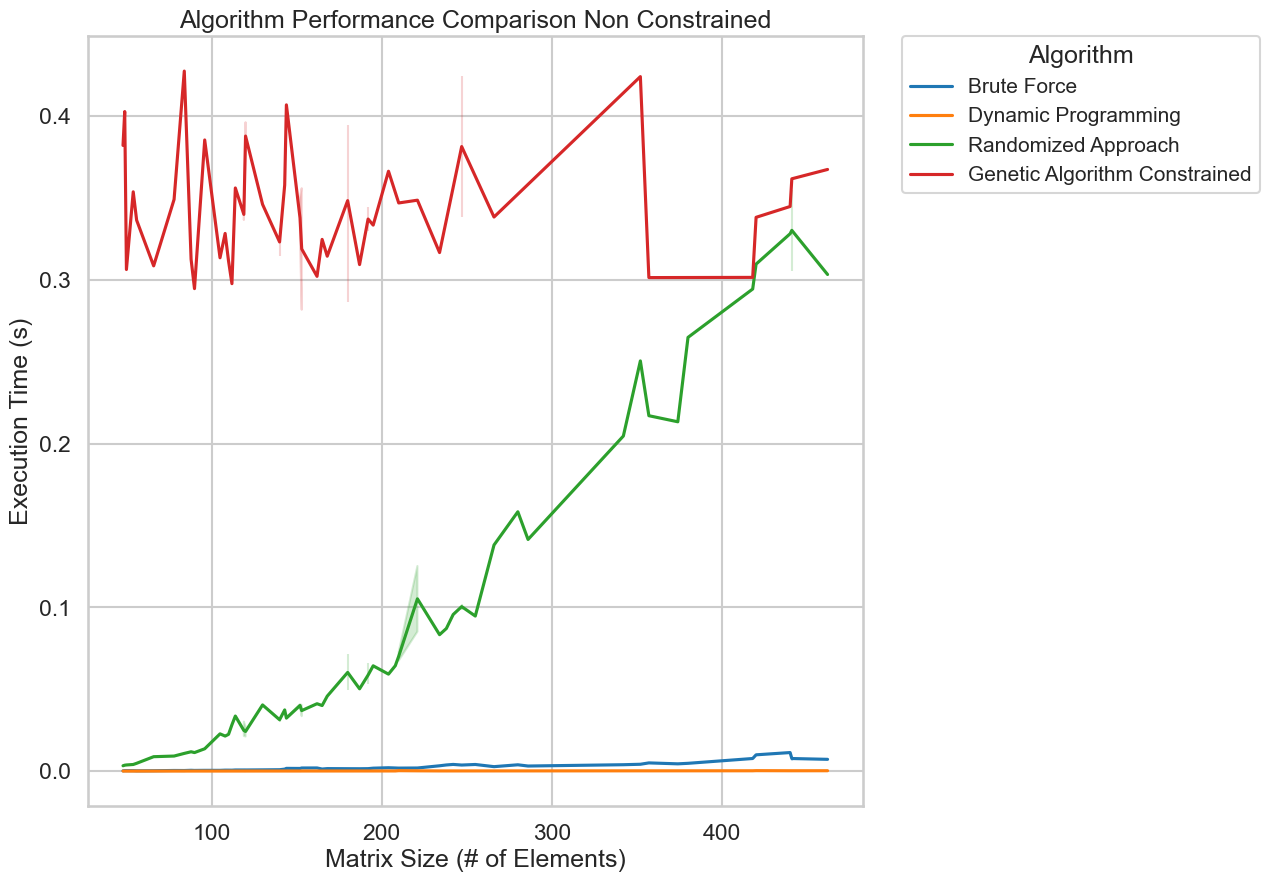

In [26]:
create_comparative_plots(all_test_results_constrained)

The Brute Force algorithm generally maintains a low execution time, while the Genetic Algorithm Constrained shows a significant spike, suggesting potential inefficiency or a specific case where it performed poorly. The Dynamic Programming and Randomized Approach remain consistent across matrix sizes, indicating stable performance.

C:\Users\Amrithya\AppData\Local\Temp\ipykernel_24284\1483780679.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Algorithm', y='Execution Time', data=df, palette="Set2")


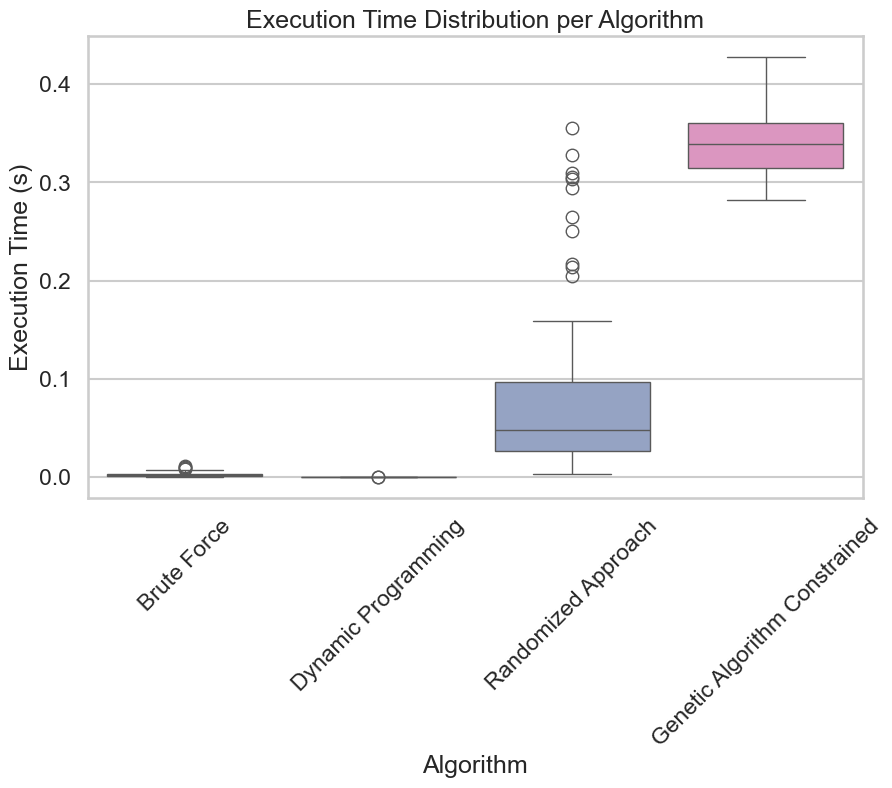

In [27]:
plot_execution_time_distribution(all_test_results_constrained)

The Brute Force algorithm has the lowest median execution time but also shows outliers, indicating occasional higher execution times. The Genetic Algorithm Constrained has a higher median and larger interquartile range, suggesting more variability in its execution time. Dynamic Programming and the Randomized Approach show tight distributions with very few outliers, emphasizing their consistent performance.

In [28]:
algorithms_to_test_constrained_BF_DP= [
    (brute_force_constrained, 'Brute Force'),
    (maxMatrixSum_constraint,'Dynamic Programming'),
]

In [29]:
all_test_results_constrained_BF_DP = run_multiple_algorithms(algorithms_to_test_constrained_BF_DP)


TESTING Brute Force WITH FIXED CONSTRAINTS


Test Case 1 skipped: Matrix is empty.

Test Case 2 skipped: Matrix is one-dimensional.

Test Case 3 skipped: Matrix is non-rectangular.

Test Case 4 skipped: Matrix is non-rectangular.

Test Case 5 skipped: Constraints k or l exceed matrix dimensions.

Test Case 6 skipped: Constraints k or l exceed matrix dimensions.

Test Case 7 succeeded
Result: 436
Expected Result: 436
Indices: (3, 0) to (6, 4)
Expected Indices: (3, 0) to (6, 4)
Matrix:
[-91, -32, -57, 65, -69, -80]
[-92, 80, -96, -96, 13, -95]
[-24, 34, 51, 64, 34, 98]
[-18, 11, -9, 94, -14, -94]
[-13, 72, 44, 86, -97, -53]
[-20, 1, 22, 25, 92, -51]
[72, 51, -26, 25, 38, -53]
[-64, 56, -76, -21, 76, 28]

Submatrix
-18	11	-9	94	-14	
-13	72	44	86	-97	
-20	1	22	25	92	
72	51	-26	25	38	

Time taken: 0.000253 seconds


Test Case 8 succeeded
Result: 54
Expected Result: 54
Indices: (0, 2) to (3, 6)
Expected Indices: (0, 2) to (3, 6)
Matrix:
[-93, 44, 94, -37, -39, -1, 56]
[39, -97, 80, -62, -85

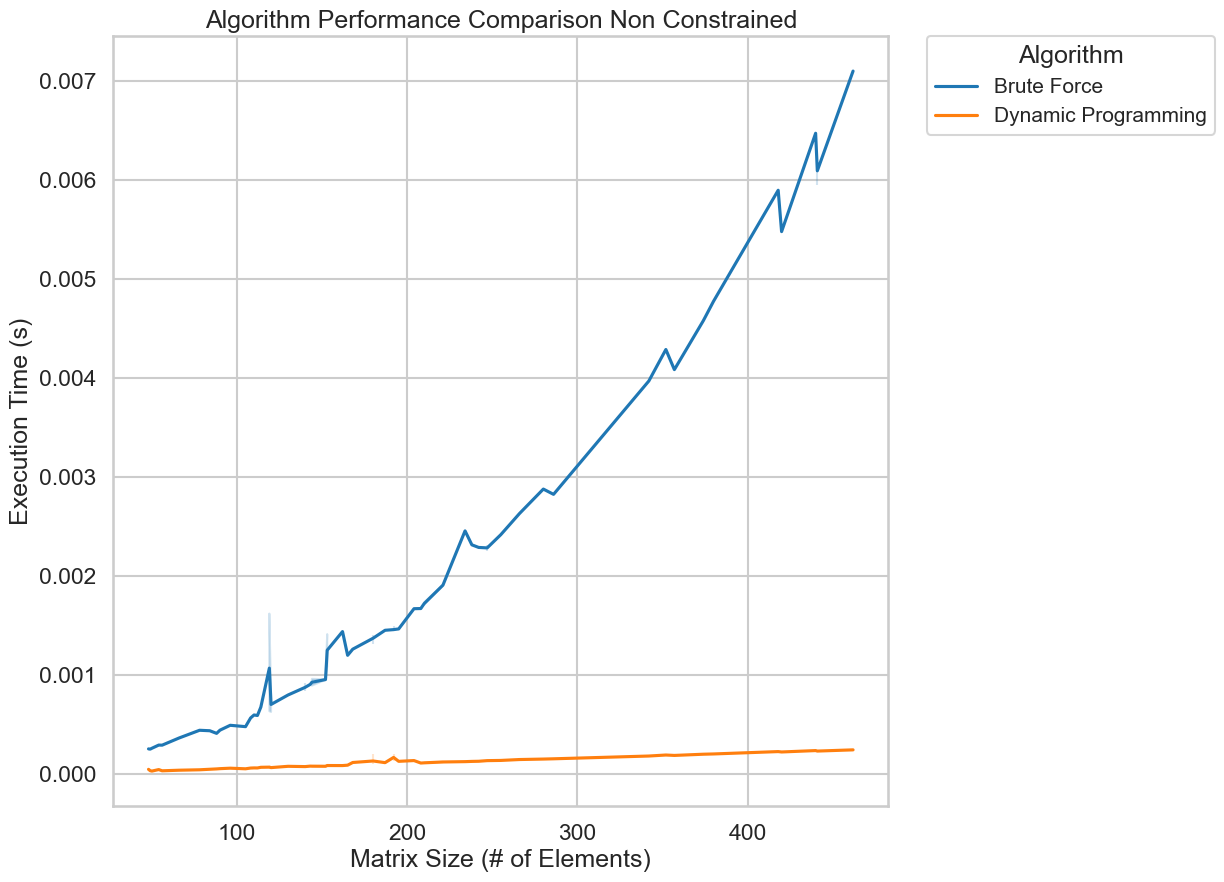

In [30]:
create_comparative_plots(all_test_results_constrained_BF_DP)

In the bar chart, the Brute Force algorithm has a significantly higher average execution time compared to Dynamic Programming, suggesting it is less efficient under constraints. The discrepancy indicates that the Brute Force algorithm's performance is more impacted by the constraints, leading to longer processing times.

C:\Users\Amrithya\AppData\Local\Temp\ipykernel_24284\3580402410.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Execution Time', y='Algorithm', data=avg_times, palette="viridis")


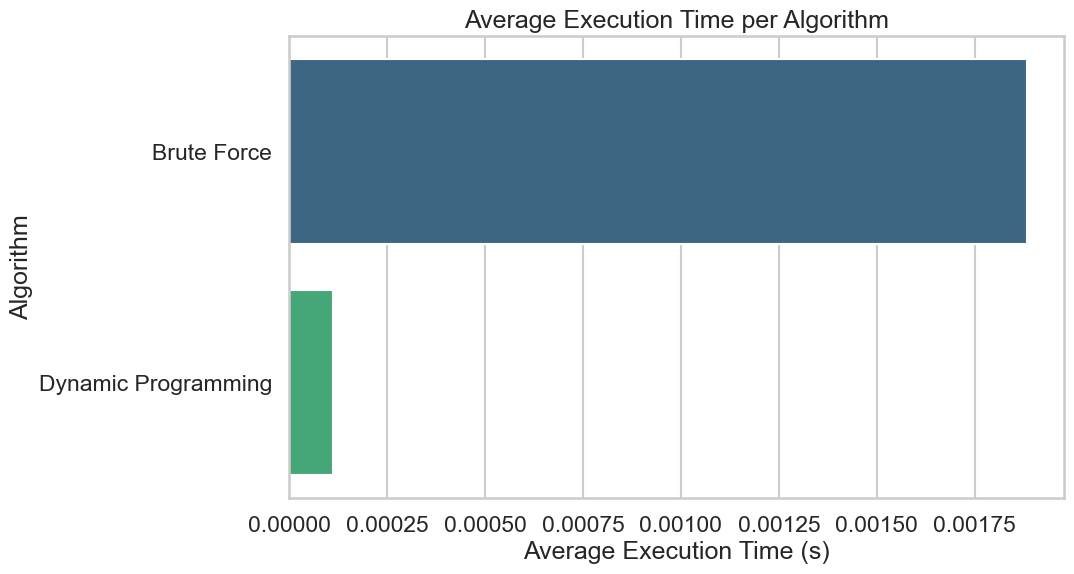

In [31]:
plot_average_execution_time(all_test_results_constrained_BF_DP)

The line chart further highlights this performance gap. As the matrix size increases, the Brute Force algorithm's execution time fluctuates and at times spikes sharply, which could suggest it's encountering scenarios where constraints make the problem particularly challenging. In contrast, Dynamic Programming maintains a relatively steady and low execution time, demonstrating better handling of constraints and more predictable performance.